# Time Series Data Analysis- Clustering for S&P 500 Data

In this demo we showcase the Clustering model by applying it to the S&P 500 dataset.

We provide realizations for the following methods:
- K-means
- Spectral Clustering
- Hierarchical Clustering
- Gaussian mixture modelling

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sys
if "../" not in sys.path:
  sys.path.append("../src/")
#import src.reduction
from cluster import Cluster
import matplotlib
%matplotlib inline 

# read SP500 data
SP500 = np.genfromtxt('../data/SP500array.csv', delimiter=',')
SP500 = SP500.T
nStock = len(SP500[:,0])
nTime = len(SP500[0,:])

# preprocessing, standardize data
X = np.copy(SP500)
for i in range(nStock):
    X[i,:] = (X[i,:] - np.mean(X[i,:]))/np.std(X[i,:])
    
from sklearn import manifold
DR= manifold.TSNE(n_components=2, random_state=0)
Y = DR.fit_transform(X)

model = Cluster(X)
print("The dimension of the S&P500 dataset is ("+str(model._nsample)+","+str(model._nfeature)+")" )

The dimension of the S&P500 dataset is (470,490)


K-means takes 0.605296134949 seconds
[1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2,

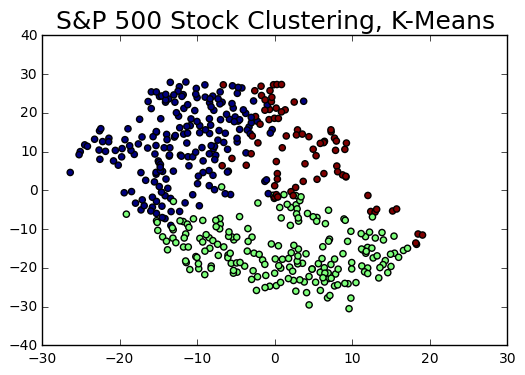

In [13]:
# run K-means

import time

start = time.time()
centroid, labels, clusters = model.kMeans(nClusters = 3)
end = time.time()

print("K-means takes "+str(end-start)+" seconds")
print(labels)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c=labels)
plt.title('S&P 500 Stock Clustering, K-Means', fontsize=18)
plt.show()

Hierarchical clustering takes 0.128064155579 seconds


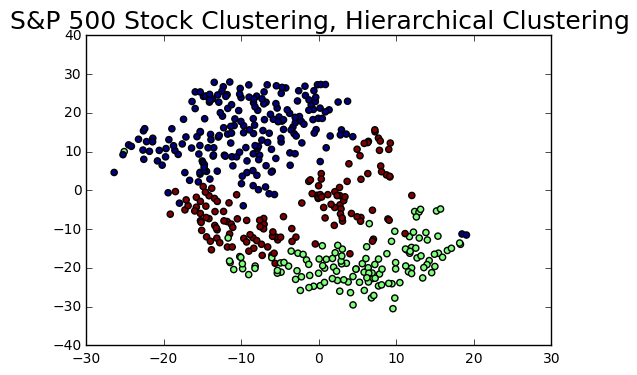

Spectral clustering takes 0.52240395546 seconds


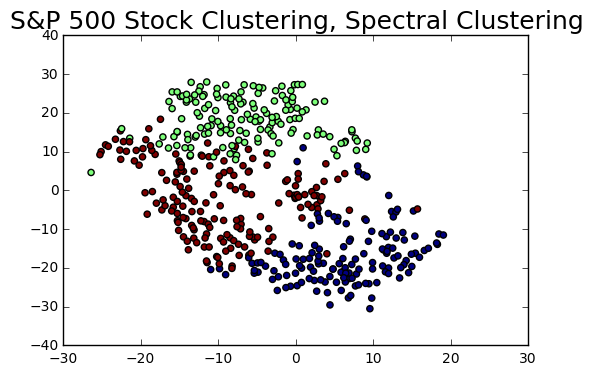

In [16]:
# hierarchical clustering
start = time.time()
centroid, labels, clusters = model.H_clustering(nClusters = 3)
end = time.time()
print("Hierarchical clustering takes "+str(end-start)+" seconds")

plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c=labels)
plt.title('S&P 500 Stock Clustering, Hierarchical Clustering', fontsize=18)
plt.show()


# Spectral Clustering
start = time.time()
labels, clusters, X_embed = model.Spectral(nClusters = 3, cluster_metric = 'euclidean', sigma = 0.05 )
end = time.time()
print("Spectral clustering takes "+str(end-start)+" seconds")

plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c=labels)
plt.title('S&P 500 Stock Clustering, Spectral Clustering', fontsize=18)
plt.show()



## Now we Compare  our method with Scikit-learn, a standard machine learning library on python

K-means takes 0.154495000839 seconds
Spectral Clustering takes 18.0054941177 seconds
Agglomerative Clustering takes 0.174695014954 seconds
Affinity Propagation takes 0.281287908554 seconds


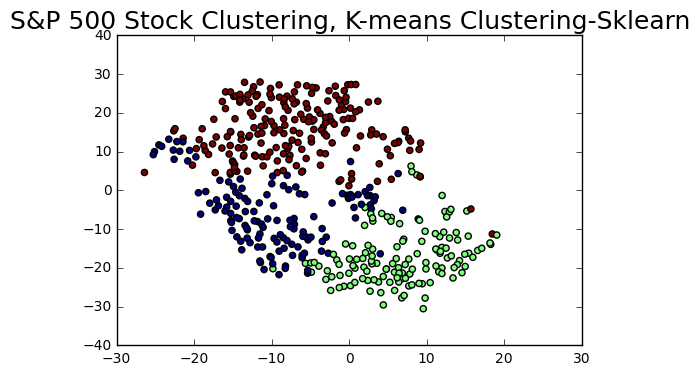

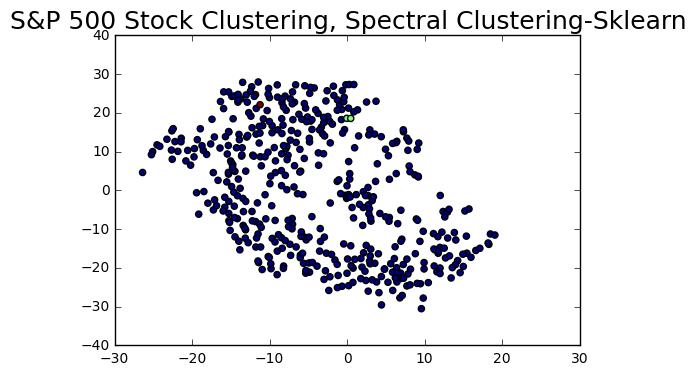

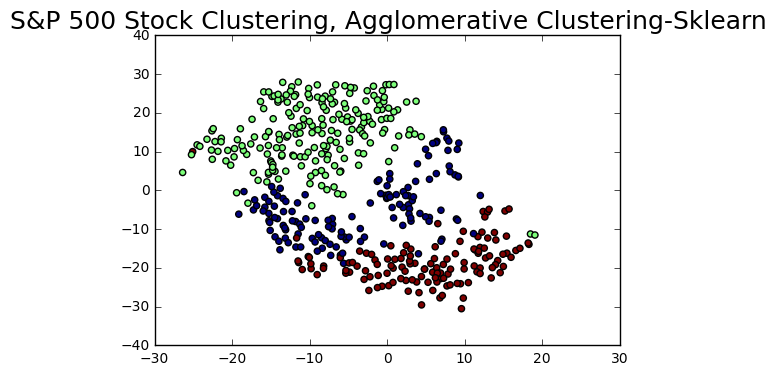

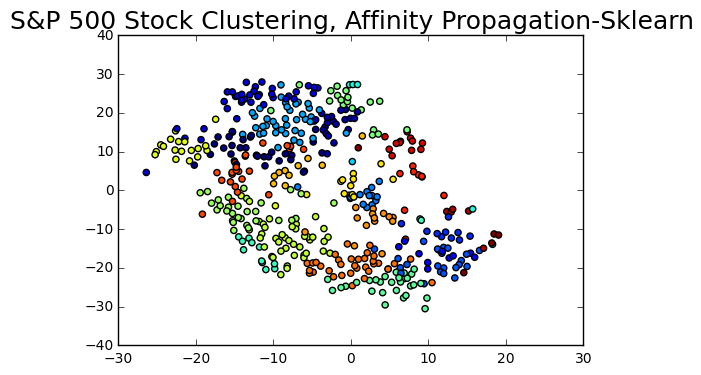

In [14]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, AffinityPropagation

start = time.time()
fit_KM = KMeans(n_clusters=3, init='random').fit(X)
end = time.time()
print("K-means takes "+str(end-start)+" seconds")
labels_km = fit_KM.labels_


start = time.time()
fit_SP = SpectralClustering(n_clusters = 3).fit(X)
end = time.time()
print("Spectral Clustering takes "+str(end-start)+" seconds")
labels_sp = fit_SP.labels_

start = time.time()
fit_AC = AgglomerativeClustering(n_clusters=3).fit(X)
end = time.time()
print("Agglomerative Clustering takes "+str(end-start)+" seconds")
labels_ac = fit_AC.labels_

start = time.time()
fit_AP = AffinityPropagation(damping=0.5).fit(X)
end = time.time()
print("Affinity Propagation takes "+str(end-start)+" seconds")
labels_ap = fit_AP.labels_

plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c=labels_km)
plt.title('S&P 500 Stock Clustering, K-means Clustering-Sklearn', fontsize=18)
plt.show()

plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c=labels_sp)
plt.title('S&P 500 Stock Clustering, Spectral Clustering-Sklearn', fontsize=18)
plt.show()

plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c=labels_ac)
plt.title('S&P 500 Stock Clustering, Agglomerative Clustering-Sklearn', fontsize=18)
plt.show()

plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c=labels_ap)
plt.title('S&P 500 Stock Clustering, Affinity Propagation-Sklearn', fontsize=18)
plt.show()